In [1]:
import numpy as np

def initialize_spin_configuration(N):
    return 2 * np.random.randint(2, size=(N, N)) - 1

In [2]:
def calculate_interaction(spin_config, i, j):
    N = spin_config.shape[0]
    interaction = 0
    
    neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
    
    for ni, nj in neighbors:
        ni = ni % N
        nj = nj % N
        interaction += spin_config[ni, nj]
    
    return -interaction * spin_config[i, j]

In [3]:
def calculate_total_spin(spin_config):
    total_spin = 0
    N = spin_config.shape[0]
    
    for i in range(N):
        for j in range(N):
            total_spin += calculate_interaction(spin_config, i, j)
    
    return total_spin

In [4]:
def flip_spin_randomly(spin_config):
    N = spin_config.shape[0]
    i, j = np.random.randint(0, N), np.random.randint(0, N)
    spin_config[i, j] *= -1


In [5]:
def calculate_spin_of_atom_and_neighbors(spin_config, i, j):
    N = spin_config.shape[0]
    spin = calculate_interaction(spin_config, i, j)
    return spin

def calculate_spin_difference_after_flip(spin_config, i, j):
    spin_before_flip = calculate_spin_of_atom_and_neighbors(spin_config, i, j)
    spin_config[i, j] *= -1
    
    spin_after_flip = calculate_spin_of_atom_and_neighbors(spin_config, i, j)
    spin_config[i, j] *= -1
    
    return spin_after_flip - spin_before_flip


In [6]:
import numpy as np

def calculate_spin_of_atom_and_neighbors(spin_config, i, j):
    N = spin_config.shape[0]
    spin = calculate_interaction(spin_config, i, j)
    return spin

def calculate_spin_difference_after_flip(spin_config, i, j):
    spin_before_flip = calculate_spin_of_atom_and_neighbors(spin_config, i, j)
    spin_config[i, j] *= -1
    
    spin_after_flip = calculate_spin_of_atom_and_neighbors(spin_config, i, j)
    spin_config[i, j] *= -1
    
    return spin_after_flip - spin_before_flip

def monte_carlo_simulation(spin_config, temperature, num_flips=10000):
    N = spin_config.shape[0]
    mag = []
    
    for _ in range(num_flips):
        i, j = np.random.randint(0, N), np.random.randint(0, N)
        spin_difference = calculate_spin_difference_after_flip(spin_config, i, j)
        beta = np.random.uniform(0, 1)
        omega = np.exp(-spin_difference / temperature)
        
        if omega > beta:
            spin_config[i, j] *= -1
            
        mag.append(np.sum(spin_config))
    
    return np.mean(mag)

temperatures = np.arange(1, 10, 0.01)
Avg_mag = []

for temp in temperatures:
    spin_config = initialize_spin_configuration(10)
    avg_magnetization = monte_carlo_simulation(spin_config, temp)
    Avg_mag.append(avg_magnetization)



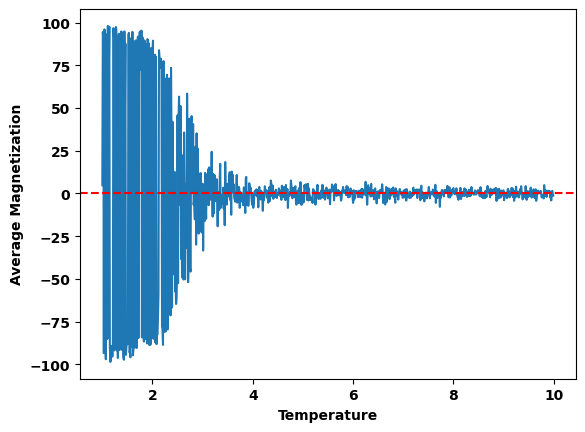

In [8]:
import matplotlib.pyplot as plt
plt.plot(temperatures, Avg_mag)
plt.xlabel('Temperature')
plt.ylabel('Average Magnetization')
plt.axhline(0, color='red', linestyle='--', label='y = 0')
plt.show()